In [1]:
import requests, json
import sqlite3 as lite
from datetime import tzinfo, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
import folium
sns.set(color_codes=True)

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


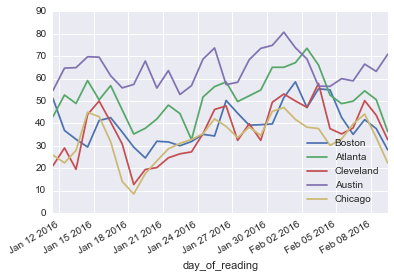

In [2]:
con = lite.connect('weather.db')
cur = con.cursor()
query = ("""SELECT `day_of_reading`, `Boston`, `Atlanta`, `Cleveland`, `Austin`, `Chicago` FROM daily_temp;""")
weather_df = pd.read_sql(query,con)
weather_df['day_of_reading'] = pd.to_datetime(weather_df['day_of_reading'], unit='s')
weather_df = weather_df.set_index('day_of_reading')
weather_df.plot()

In [3]:
cities = { "Atlanta": '33.762909,-84.422675',
			"Austin": '30.303936,-97.754355',
			"Boston": '42.331960,-71.020173',
			"Chicago": '41.837551,-87.681844',
			"Cleveland": '41.478462,-81.679435'
		}

cord_cities = dict()

for k,v in cities.iteritems():
    t = [x for x in v.split(',')]
    cord_cities[k] = dict()
    cord_cities[k][0] = t[0]
    cord_cities[k][1] = t[1]

print cord_cities
map_atl = folium.Map(location=[cord_cities['Atlanta'][0],cord_cities['Atlanta'][1]])
map_atl

{'Boston': {0: '42.331960', 1: '-71.020173'}, 'Atlanta': {0: '33.762909', 1: '-84.422675'}, 'Chicago': {0: '41.837551', 1: '-87.681844'}, 'Austin': {0: '30.303936', 1: '-97.754355'}, 'Cleveland': {0: '41.478462', 1: '-81.679435'}}
